<a href="https://colab.research.google.com/github/titispajarningsih/prediksi-waktu-yang-dibutuhkan-untuk-antar-makanan-ke-lokasi-tujuan/blob/main/SDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
url = '/content/drive/MyDrive/SDR TUBES/deliverytime.csv'
delivery_time = pd.read_csv(url)
delivery_time

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [78]:
delivery_time.shape

(45593, 11)

In [79]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [80]:
delivery_time.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [81]:
delivery_time.duplicated().sum()

0

In [82]:
delivery_time.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

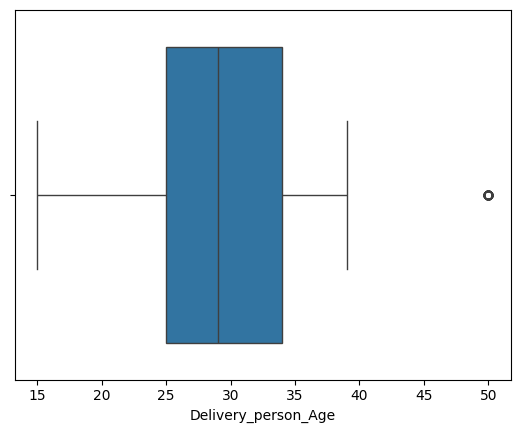

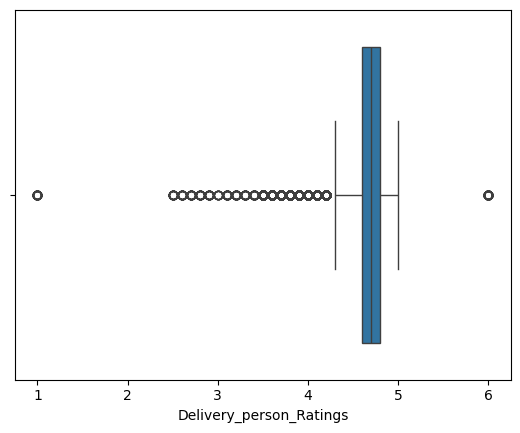

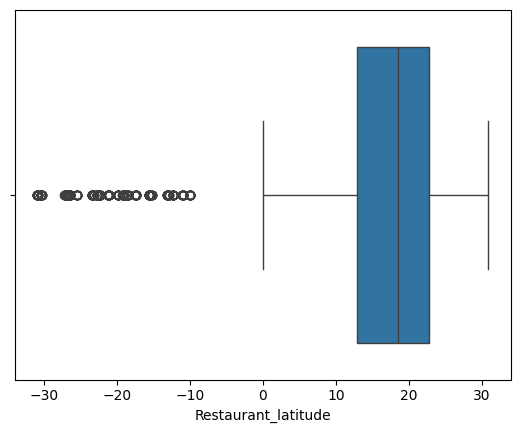

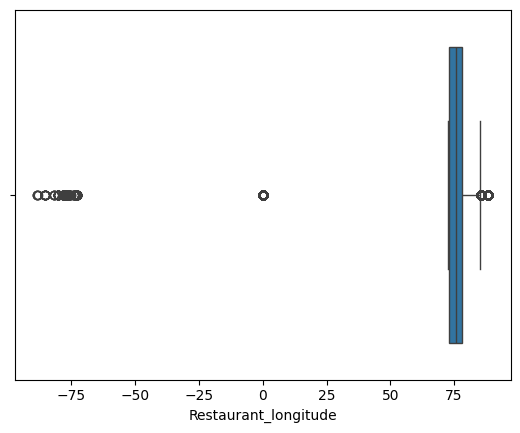

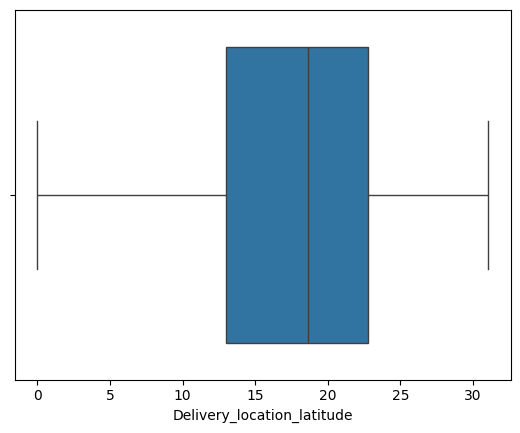

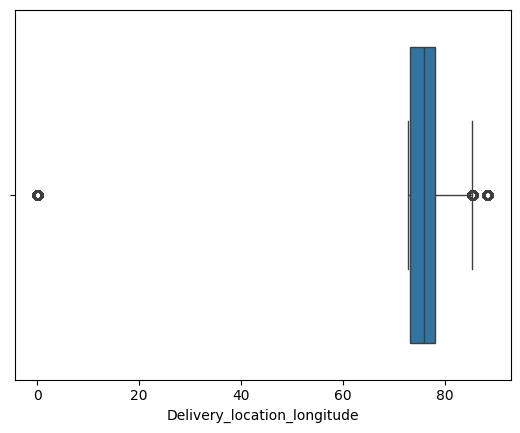

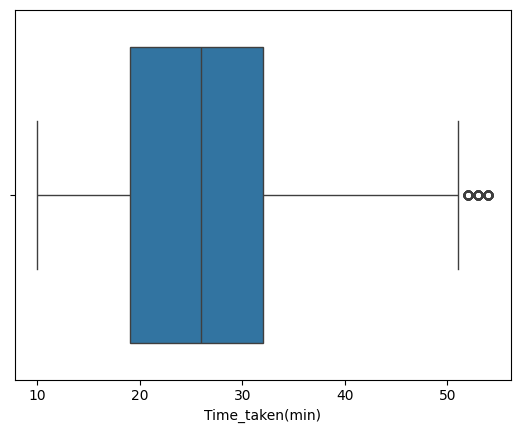

In [83]:
delivery1=delivery_time.select_dtypes(exclude=['object'])
for column in delivery1:
        plt.figure()
        sns.boxplot(data=delivery1, x=column)

In [84]:
Q1 = delivery_time.quantile(0.25)
Q3 = delivery_time.quantile(0.75)
IQR=Q3-Q1

delivery_time = delivery_time[~((delivery_time<(Q1-1.5*IQR))|(delivery_time>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-84-62ccc7aef150>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = delivery_time.quantile(0.25)
<ipython-input-84-62ccc7aef150>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = delivery_time.quantile(0.75)
<ipython-input-84-62ccc7aef150>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  delivery_time = delivery_time[~((delivery_time<(Q1-1.5*IQR))|(delivery_time>(Q3+1.5*IQR))).any(axis=1)]


In [85]:
delivery_time.shape

(33951, 11)

In [86]:
categorical_features = ['Type_of_vehicle']
numerical_features = ['Delivery_person_Age',	'Delivery_person_Ratings',	'Restaurant_latitude',	'Restaurant_longitude',	'Delivery_location_latitude',	'Delivery_location_longitude']

                   Jumlah sampel  Persentase
motorcycle                 19472        57.4
scooter                    11588        34.1
electric_scooter            2859         8.4
bicycle                       32         0.1


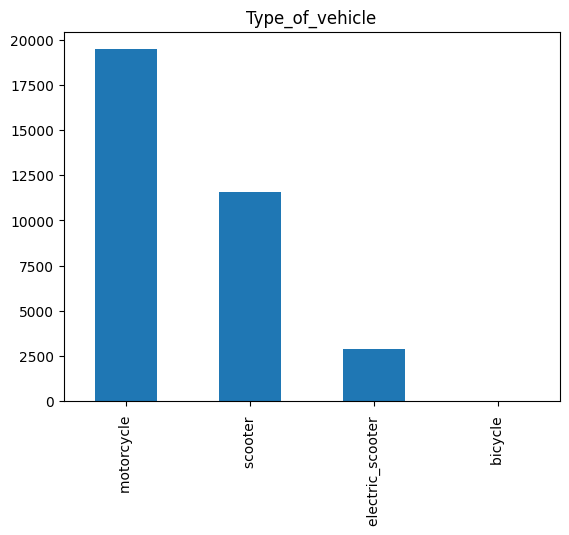

In [87]:
feature = categorical_features[0]
count = delivery_time[feature].value_counts()
percent = 100*delivery_time[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [88]:
categorical_features1 = ['Type_of_order']
numerical_features = ['Delivery_person_Age',	'Delivery_person_Ratings',	'Restaurant_latitude',	'Restaurant_longitude',	'Delivery_location_latitude',	'Delivery_location_longitude']

         Jumlah sampel  Persentase
Snack             8627        25.4
Drinks            8461        24.9
Buffet            8440        24.9
Meal              8423        24.8


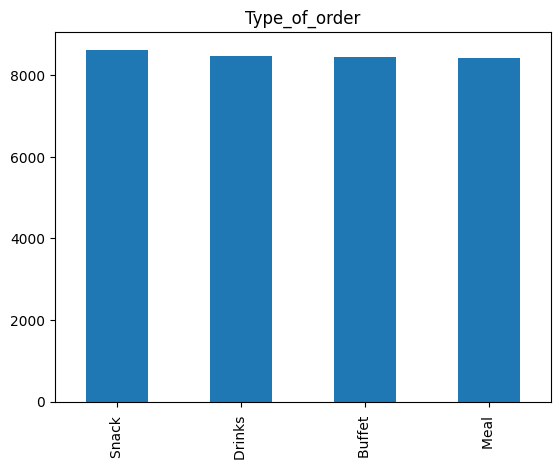

In [89]:
feature = categorical_features1[0]
count = delivery_time[feature].value_counts()
percent = 100*delivery_time[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

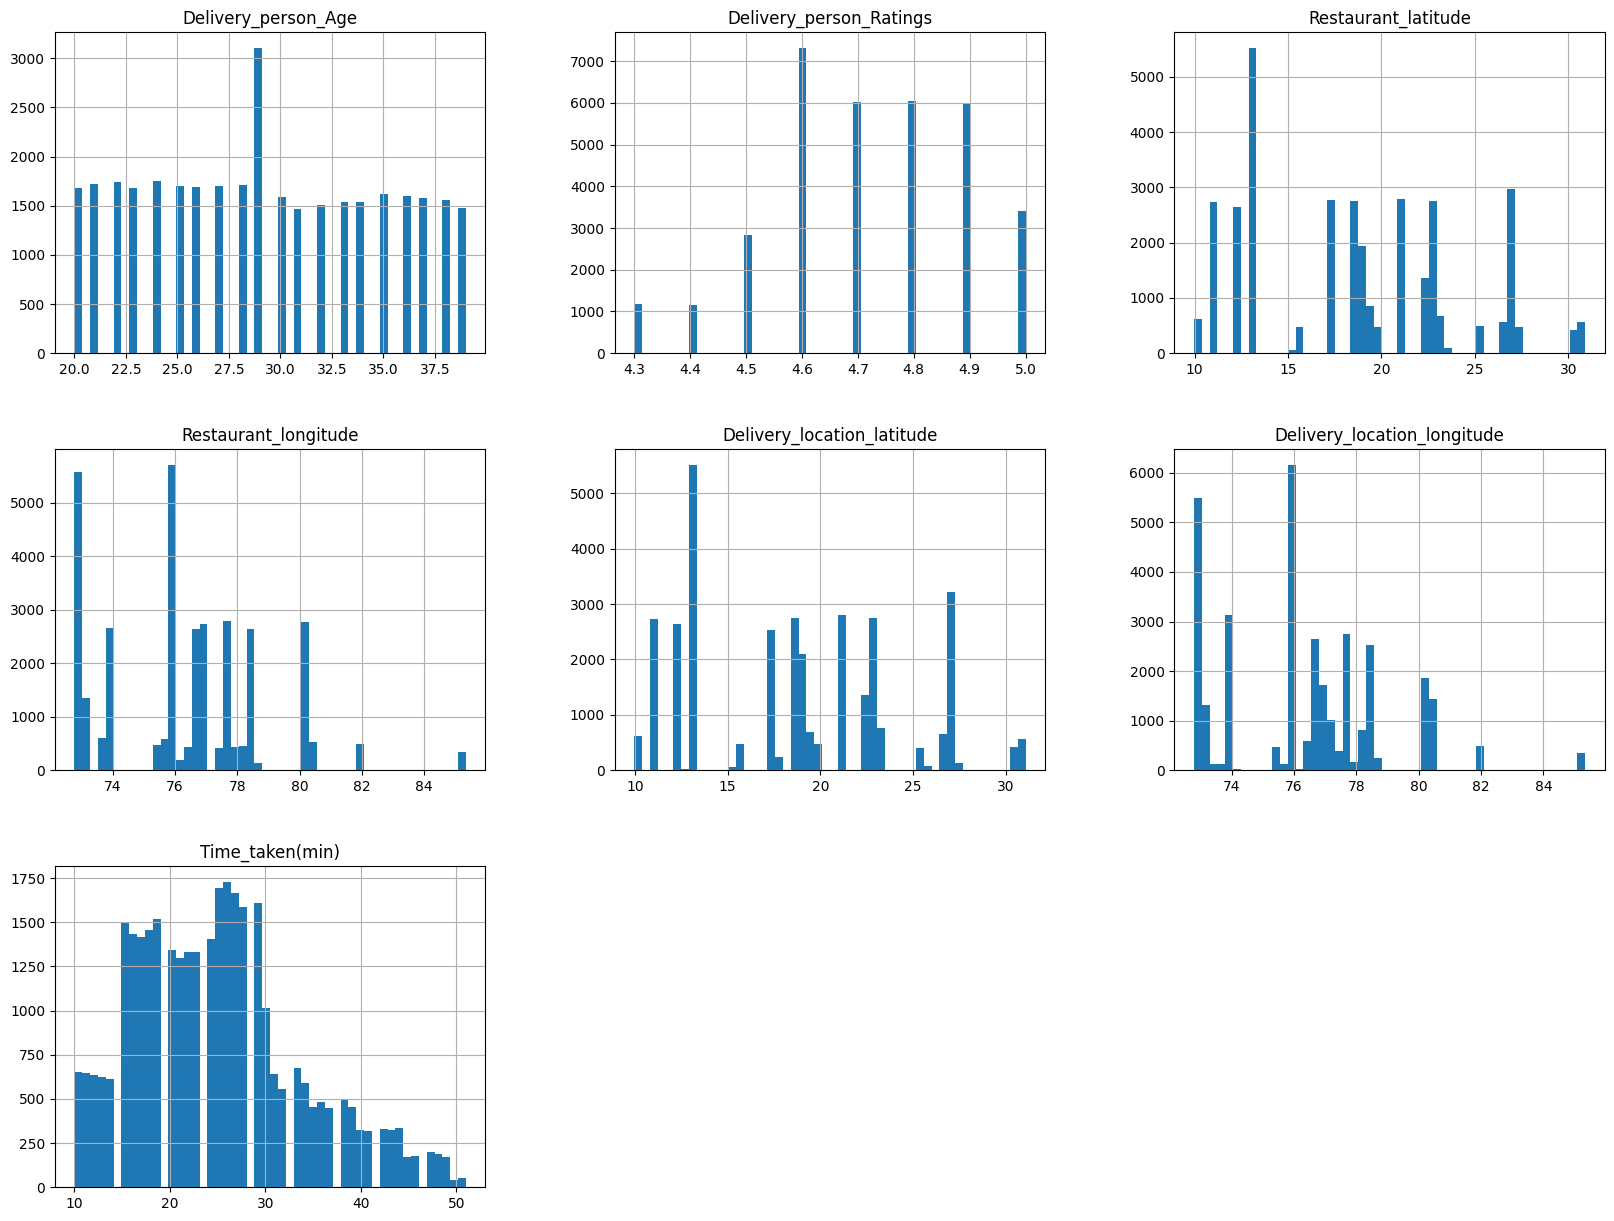

In [90]:
delivery_time.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-91-3ec687ca47cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Time_taken(min)', kind="bar", dodge=False, height = 4, aspect = 3,  data=delivery_time, palette="Set3")
<ipython-input-91-3ec687ca47cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Time_taken(min)', kind="bar", dodge=False, height = 4, aspect = 3,  data=delivery_time, palette="Set3")
<ipython-input-91-3ec687ca47cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Time_taken(min)', kind="bar", dodge=False, height = 4, aspect = 3,

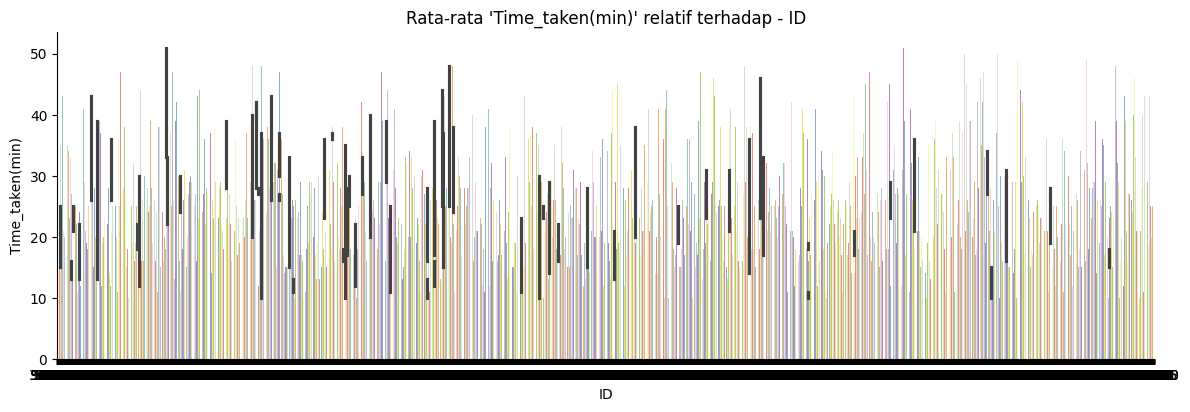

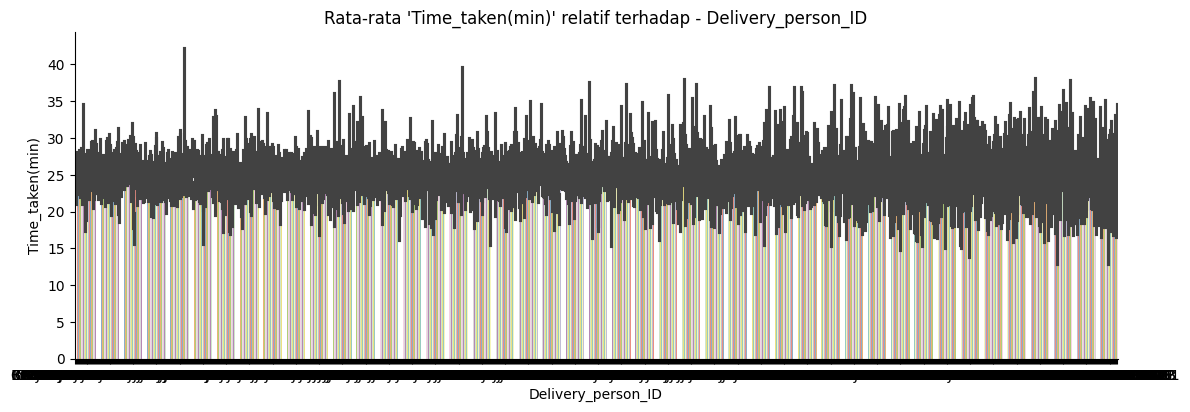

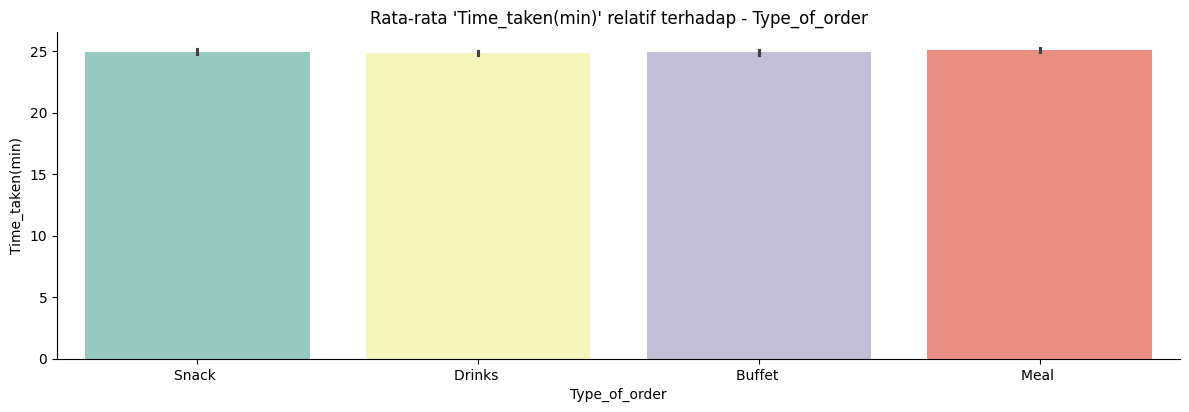

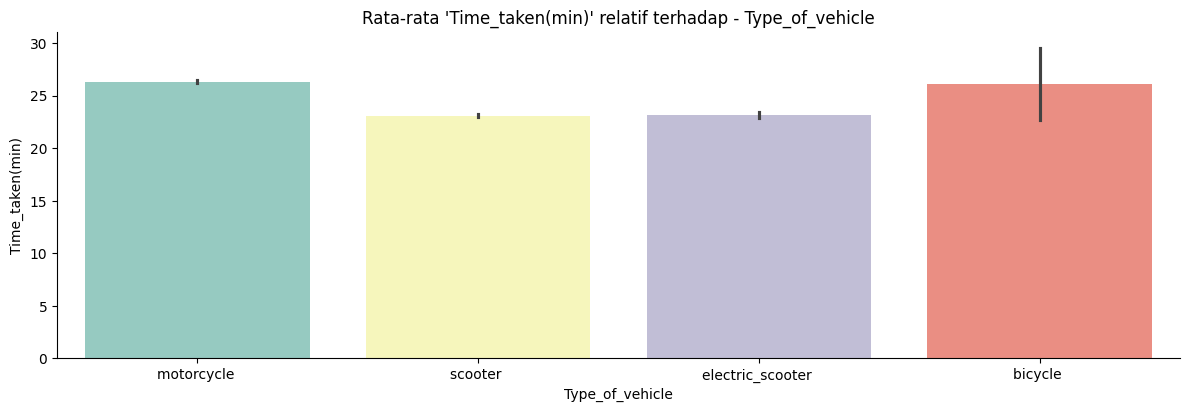

In [91]:
cat_features = delivery_time.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='Time_taken(min)', kind="bar", dodge=False, height = 4, aspect = 3,  data=delivery_time, palette="Set3")
  plt.title("Rata-rata 'Time_taken(min)' relatif terhadap - {}".format(col))


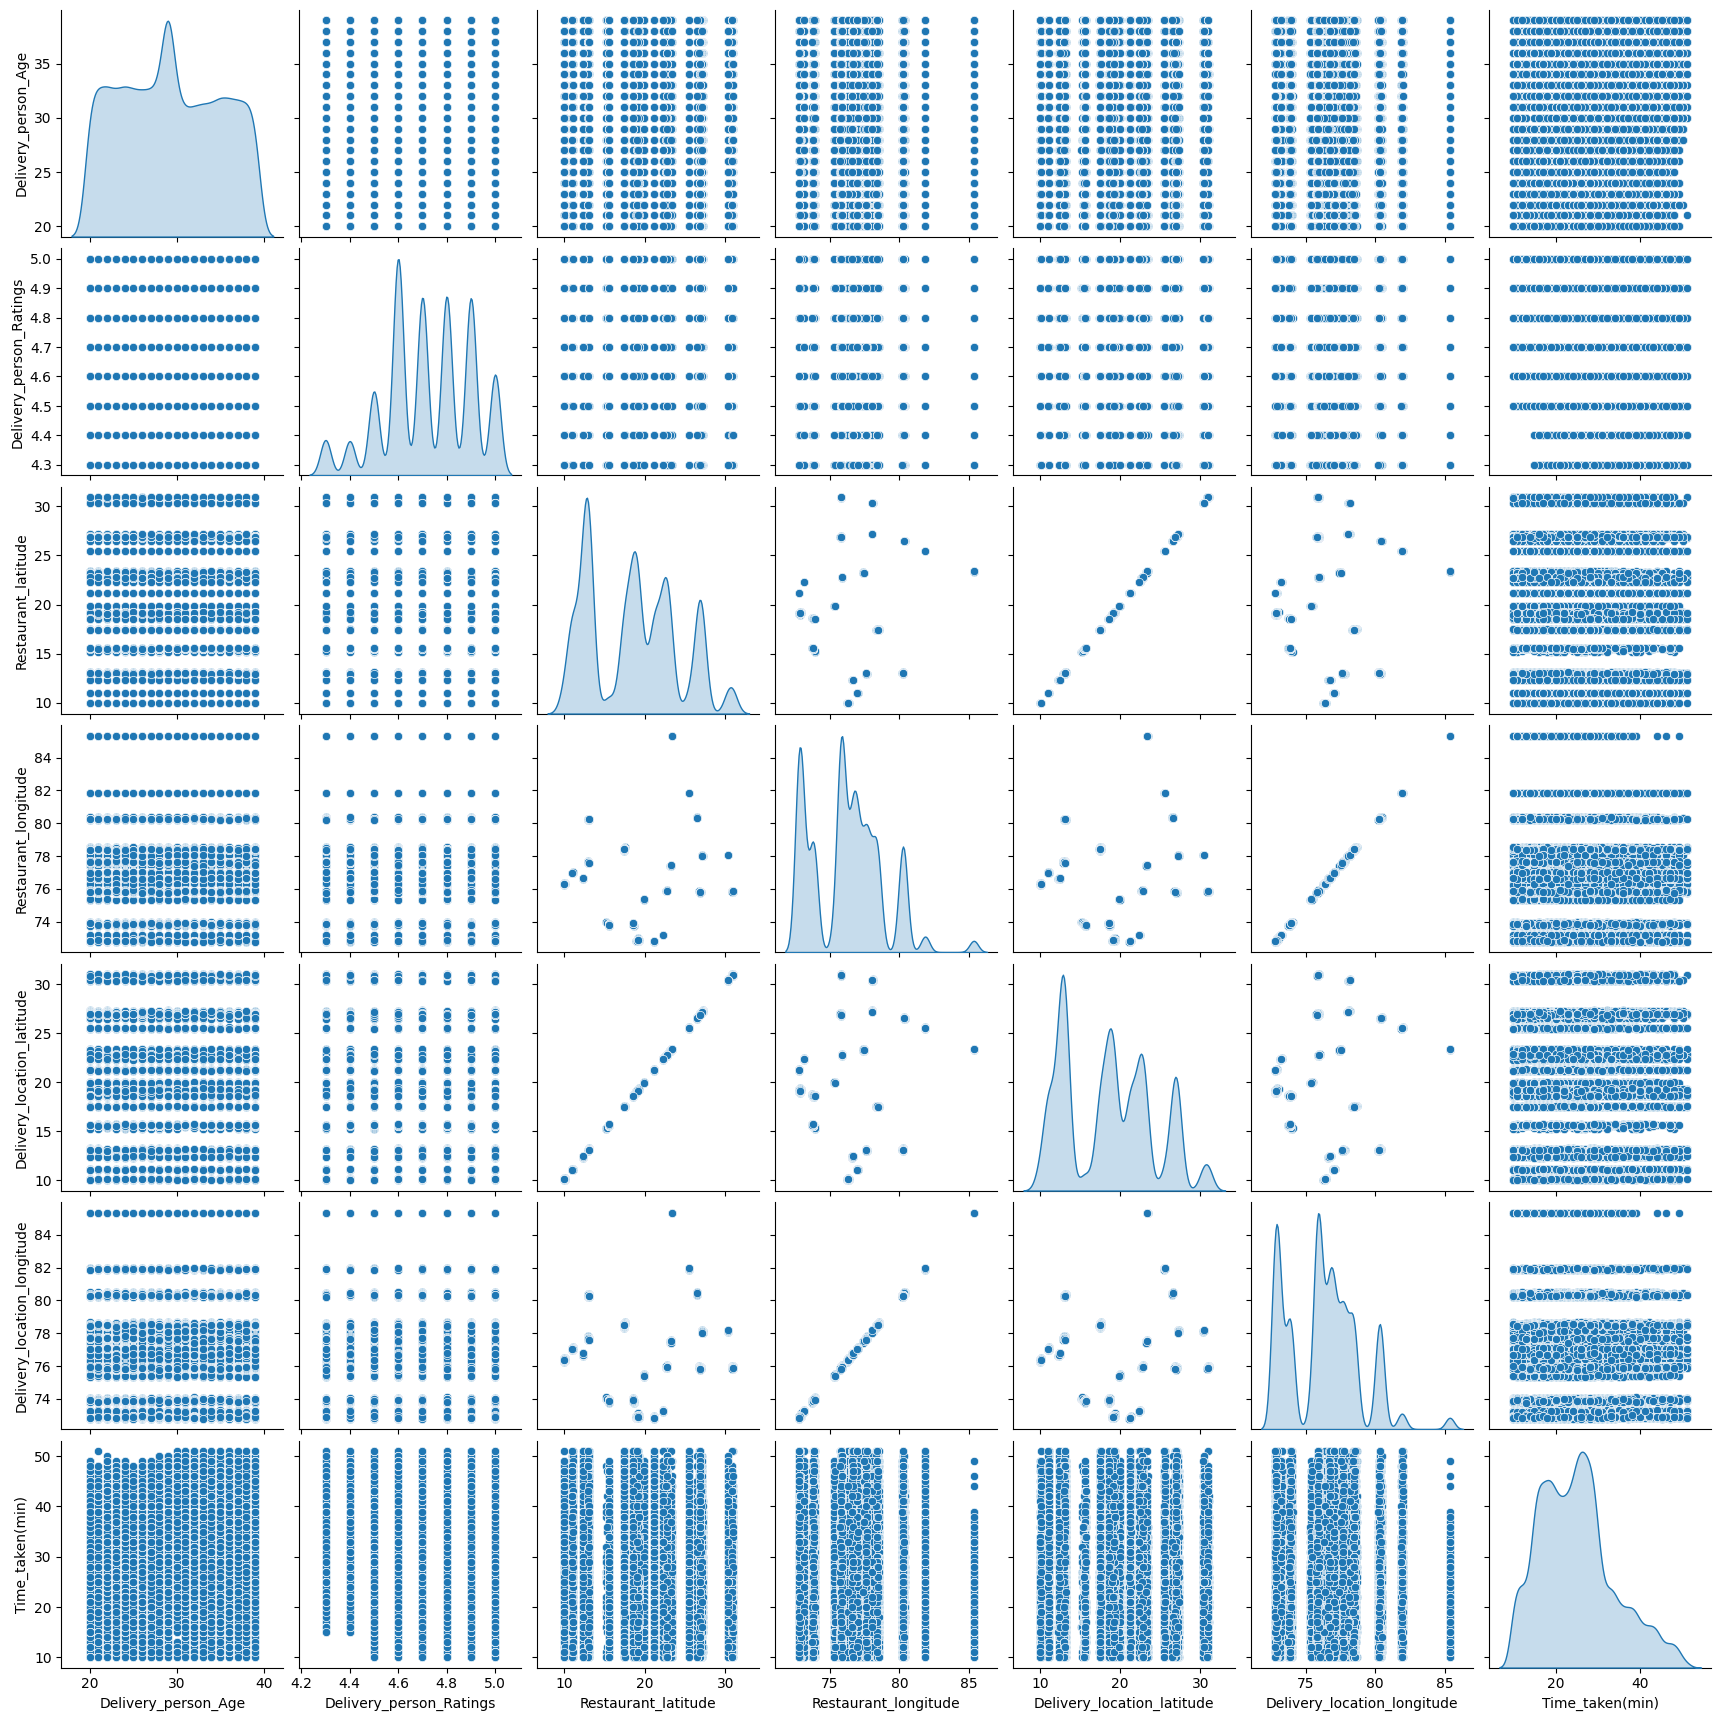

In [92]:
sns.pairplot(delivery_time, diag_kind = 'kde')

<ipython-input-93-4df8881a44f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = delivery_time.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

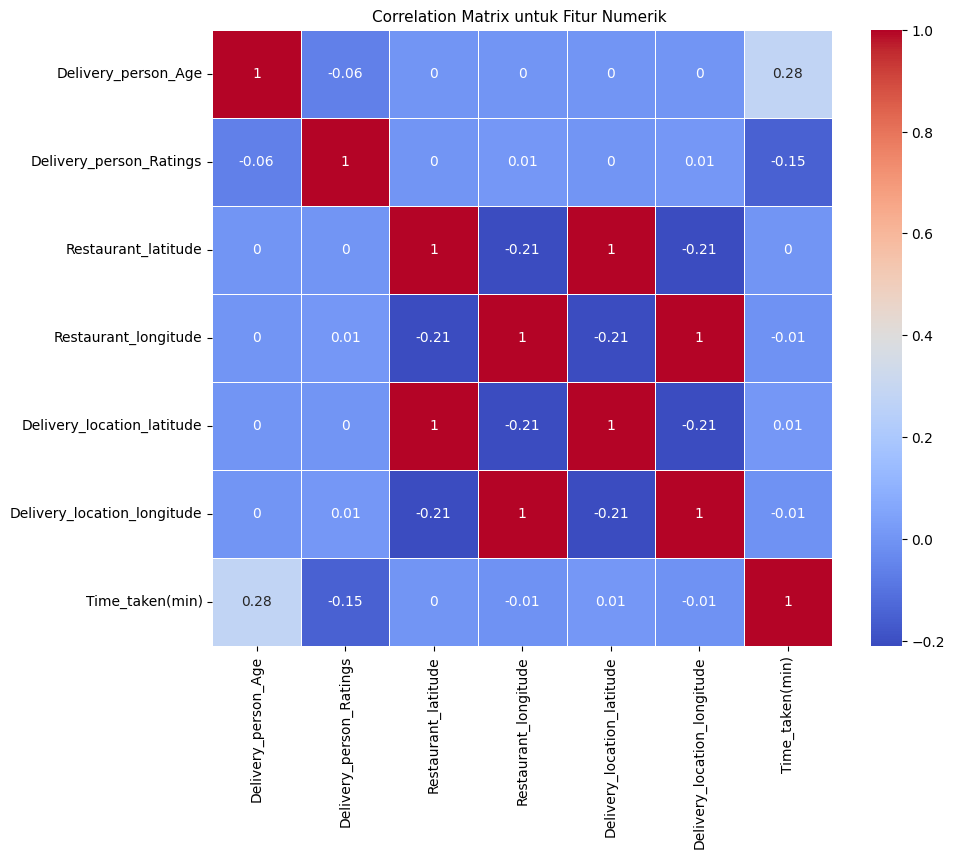

In [93]:
plt.figure(figsize=(10, 8))
correlation_matrix = delivery_time.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=11)

In [94]:
delivery_time.drop(['Delivery_person_Ratings'], inplace=True, axis=1)
delivery_time.head()

<ipython-input-94-3bc8d22c78fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time.drop(['Delivery_person_Ratings'], inplace=True, axis=1)


,ID,Delivery_person_ID,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [95]:
delivery_time.drop(['ID','Delivery_person_ID'], inplace=True, axis=1)
delivery_time.head()

<ipython-input-95-998c3e7db37e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time.drop(['ID','Delivery_person_ID'], inplace=True, axis=1)


,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


Encoding

In [96]:
from sklearn.preprocessing import  OneHotEncoder
delivery_time = pd.concat([delivery_time, pd.get_dummies(delivery_time['Type_of_order'], prefix='Type_of_order')],axis=1)
delivery_time.drop(['Type_of_order'], axis=1, inplace=True)
delivery_time.head()

,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_vehicle,Time_taken(min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37,22.745049,75.892471,22.765049,75.912471,motorcycle,24,0,0,0,1
1,34,12.913041,77.683237,13.043041,77.813237,scooter,33,0,0,0,1
2,23,12.914264,77.678400,12.924264,77.688400,motorcycle,26,0,1,0,0
3,38,11.003669,76.976494,11.053669,77.026494,motorcycle,21,1,0,0,0
4,32,12.972793,80.249982,13.012793,80.289982,scooter,30,0,0,0,1


In [97]:
from sklearn.preprocessing import  OneHotEncoder
delivery_time = pd.concat([delivery_time, pd.get_dummies(delivery_time['Type_of_vehicle'], prefix='Type_of_vehicle')],axis=1)
delivery_time.drop(['Type_of_vehicle'], axis=1, inplace=True)
delivery_time.head()

,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37,22.745049,75.892471,22.765049,75.912471,24,0,0,0,1,0,0,1,0
1,34,12.913041,77.683237,13.043041,77.813237,33,0,0,0,1,0,0,0,1
2,23,12.914264,77.678400,12.924264,77.688400,26,0,1,0,0,0,0,1,0
3,38,11.003669,76.976494,11.053669,77.026494,21,1,0,0,0,0,0,1,0
4,32,12.972793,80.249982,13.012793,80.289982,30,0,0,0,1,0,0,0,1


PCA

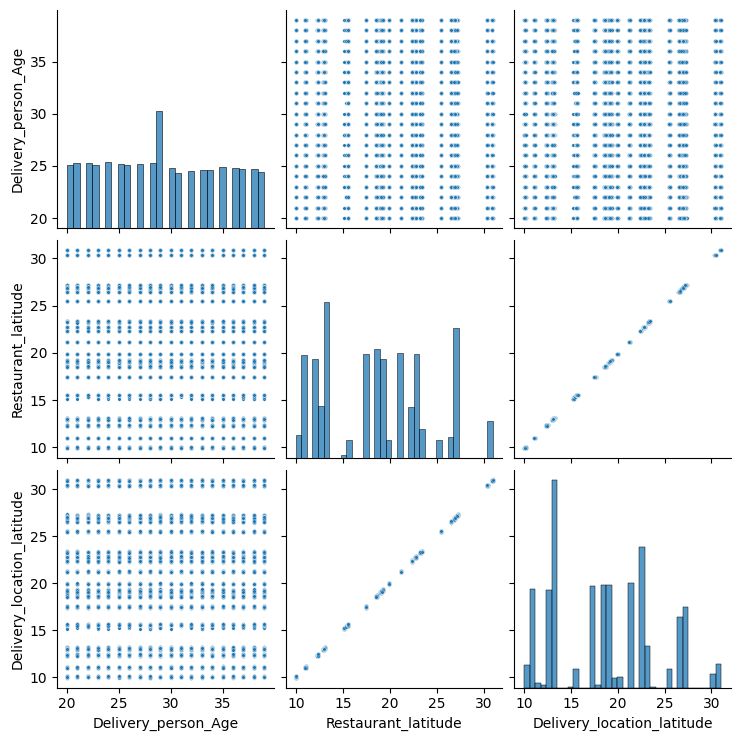

In [98]:
sns.pairplot(delivery_time[['Delivery_person_Age', 'Restaurant_latitude', 'Delivery_location_latitude']], plot_kws={"s": 6})


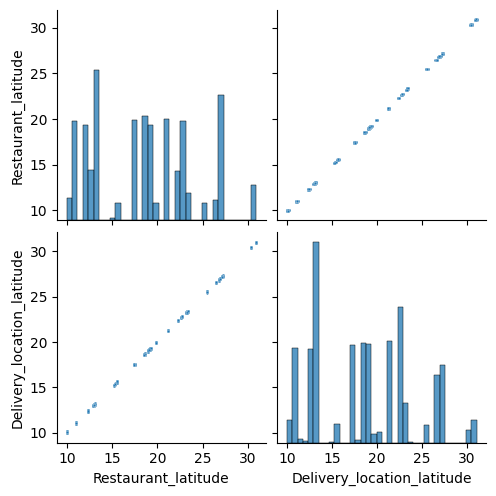

In [99]:
sns.pairplot(delivery_time[['Restaurant_latitude', 'Delivery_location_latitude']], plot_kws={"s": 2})


In [100]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2, random_state=12)
pca.fit(delivery_time[['Restaurant_latitude', 'Delivery_location_latitude']])
princ_comp = pca.transform(delivery_time[['Restaurant_latitude', 'Delivery_location_latitude']])


In [ ]:
pca.explained_variance_ratio_.round(2)

array([1., 0.])

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(delivery_time[['Restaurant_latitude', 'Delivery_location_latitude']])
delivery_time['delivery_time2'] = pca.transform(delivery_time.loc[:, ('Restaurant_latitude', 'Delivery_location_latitude')]).flatten()
delivery_time.drop(['Restaurant_latitude', 'Delivery_location_latitude'], axis=1, inplace=True)
delivery_time.head()

,Delivery_person_Age,Restaurant_longitude,Delivery_location_longitude,Time_taken(min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,delivery_time2
0,37,75.892471,75.912471,24,0,0,0,1,0,0,1,0,5.877711
1,34,77.683237,77.813237,33,0,0,0,1,0,0,0,1,-7.949056
2,23,77.678400,77.688400,26,0,1,0,0,0,0,1,0,-8.032190
3,38,76.976494,77.026494,21,1,0,0,0,0,0,1,0,-10.705891
4,32,80.249982,80.289982,30,0,0,0,1,0,0,0,1,-7.928201


Train-Test-Split

In [102]:
from sklearn.model_selection import train_test_split

X = delivery_time.drop(["Time_taken(min)"],axis =1)
y = delivery_time["Time_taken(min)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

In [103]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 33951
Total # of sample in train dataset: 30555
Total # of sample in test dataset: 3396


Standarisasi

In [104]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['delivery_time2','Delivery_person_Age']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,delivery_time2,Delivery_person_Age
14366,0.743712,1.372703
32622,-1.374855,0.840515
5432,-1.549346,-1.110839
16734,-1.010380,0.485724
43811,0.474133,1.372703


In [105]:

X_train[numerical_features].describe().round(4)

,delivery_time2,Delivery_person_Age
count,30555.0000,30555.0000
mean,-0.0000,0.0000
std,1.0000,1.0000
min,-1.5684,-1.6430
25%,-1.0150,-0.9334
50%,0.0002,-0.0465
75%,0.7513,0.8405
max,2.2474,1.7275


Model Development

In [106]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression', 'RidgeRegression', 'RandomForest', 'RandomForest_GridSearchCV'])


1. Regresi Linier

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)
print ('Coefficients: ', LR .coef_)
print ('Intercept: ', LR .intercept_)
models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred = LR.predict(X_train), y_true=y_train)

Coefficients:  [ 2.55249398e+00 -7.37117584e+01  7.36984387e+01 -1.37877456e-02
 -1.23954450e-01  1.41561449e-01 -3.81925375e-03  1.32883630e+00
 -1.44752847e+00  1.61735482e+00 -1.49866264e+00 -9.74125925e-02]
Intercept:  21.097428527773424


2. Ridge Regression


In [108]:
from sklearn.linear_model import Ridge
RR = Ridge()
RR.fit(X_train, y_train)
models.loc['train_mse','Ridge Regression'] = mean_squared_error(y_pred = RR.predict(X_train), y_true=y_train)

3. Random Forest

In [109]:
#Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

#buat model prediksi
RF1 = RandomForestRegressor(random_state=100)
RF1.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF1.predict(X_train), y_true=y_train)

Random Forest dengan Tuning GridSearchCV

In [110]:
params = {'n_estimators' : [50,80,100],
          'max_depth' : [3,5,10],
           'min_samples_split':[2,3,4],
            'min_samples_leaf': [2,3,4]}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator= RF1 , param_grid=params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             scoring='r2')

In [111]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [112]:
RF2 = RandomForestRegressor(max_depth =10,min_samples_leaf = 4,min_samples_split = 2,n_estimators = 100,random_state=100)
RF2.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF2.predict(X_train), y_true=y_train)

Evaluasi Model

In [113]:
def metrics(name,key,arg):
    print('Name of the model: ',name)
    print('R^2 of the model:',r2_score(key,arg))
    print('MSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))
    print('......')

In [114]:
y_LR = LR.predict(X_test)
y_RR = RR.predict(X_test)
y_RF1 = RF1.predict(X_test)
y_RF2 = RF2.predict(X_test)

metrics('Performa Model 1', y_test, y_LR)
metrics('Performa Model 2', y_test, y_RR)
metrics('Performa Model 3', y_test, y_RF1)
metrics('Performa Model 4', y_test, y_RF2)

Name of the model:  Performa Model 1
R^2 of the model: -74.52030902734705
MSE of the model: 75.46161185307521
MAE of the model: 74.10977269043104
......
Name of the model:  Performa Model 2
R^2 of the model: -74.30663755394067
MSE of the model: 75.35478353653197
MAE of the model: 74.00364805451821
......
Name of the model:  Performa Model 3
R^2 of the model: -0.28436114329343876
MSE of the model: 9.840967040852833
MAE of the model: 8.182609554658141
......
Name of the model:  Performa Model 4
R^2 of the model: -0.17376766906387964
MSE of the model: 9.407739205161636
MAE of the model: 7.846619330024802
......


In [120]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [121]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','RR','RF1', 'RF2'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': LR, 'RR': RR, 'RF1': RF1, 'RF2': RF2}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
LR,0.061977,0.241069
RR,0.061993,0.240573
RF1,0.010935,0.078032
RF2,0.059799,0.079826


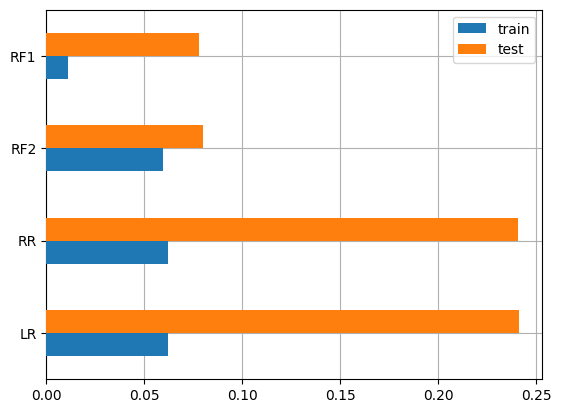

In [122]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)


In [123]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_RR,prediksi_RF1,prediksi_RF2
25003,22,10.3,10.3,19.7,20.6
